Title: Predicting Newsletter Subscription from Player Characteristics and Gaming Engagement

Introduction

Background:

Gaming industry has become more and more competitive. It is important to study players' engagement and behaviour to keep players involved. 

Question:

This study aims to reveal which players' characteristics and behaviours strongly reflect the trend of subscribing to a game-related newsletter. In other words, predicting what types of players are more likely to subscribe to a game-related newsletter.

Data Description:

The dataset "players.csv" will be analyzed. The dataset includes basic information of 196 players'... 
    
    - name in character type,
    - age in double type,
    - gender in character type, and
    - hashedEmail in character type,
    
and most importantly in terms of evaluating gaming engagement, their
    
    - experience levels in character type, and
    - played hours in double type. 

This study will mainly use players' age, gender, experience levels and played hours for analysis.


Methods & Results:

In [17]:
library(tidyverse)
library(tidymodels)

First, we read the dataset from players.csv using read_csv() function.

In [19]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Here is the proportion of players who subscribed to newspaper and players who did not.

In [21]:
subscription_rate <- players |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    mutate(percent = count/nrow(players) * 100)
subscription_rate

subscribe,count,percent
<lgl>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


Out of the 196 players, 144 of them subscribed to newspaper, taking up around 73.5%. Whereas only 52 people did not subscribe, taking up 26.5%.

In [11]:
subscribed_players <- players |>
    filter(subscribe == TRUE)
subscribed_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23


Using histogram to determine the distribution of players by age who subscribed to newspaper:

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


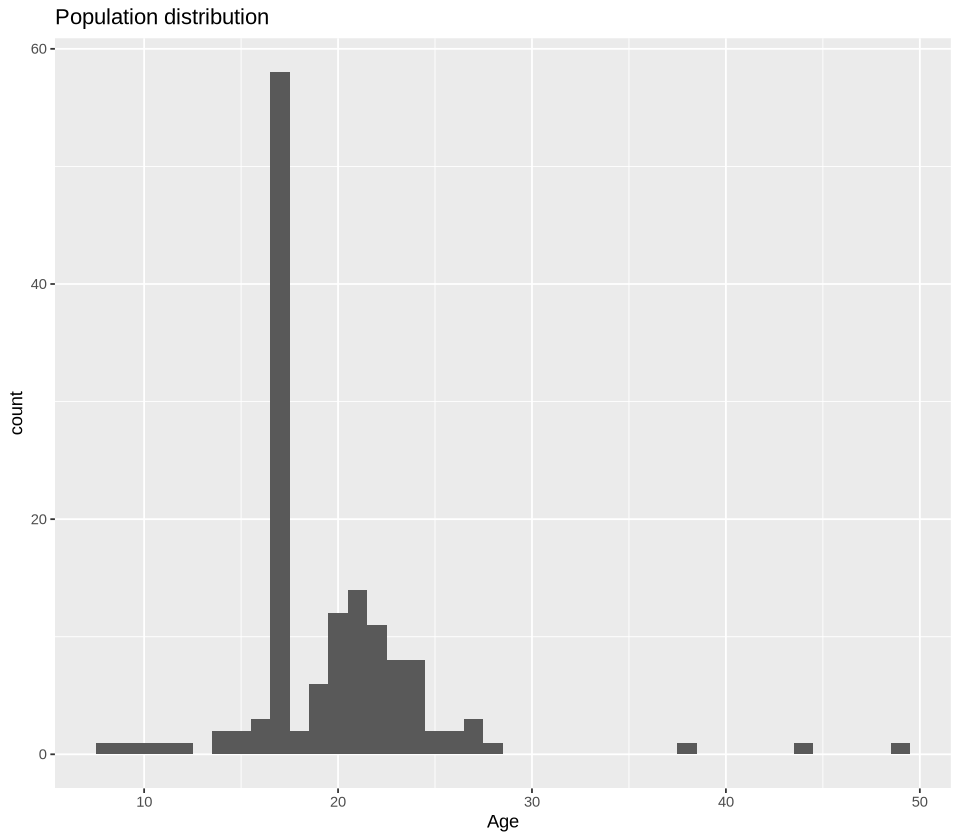

In [24]:
options(repr.plot.width = 8, repr.plot.height = 7)

pop_dist <- ggplot(subscribed_players, aes(x = Age)) + 
    geom_histogram(binwidth = 1) +
    xlab("Age") +
    ggtitle("Population distribution")
pop_dist

It is hard to tell the population mean by just observing the distribution shape and center, which also indicates that there is no obvious trend or corellation between age and subscribe behaviour.

In [25]:
sub_players <- players |>
    group_by(experience, subscribe) |>
    summarize(average_hours = mean(played_hours))
sub_players

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,average_hours
<chr>,<lgl>,<dbl>
Amateur,FALSE,0.36666667
Amateur,TRUE,8.27777778
Beginner,FALSE,1.17500000
Beginner,TRUE,1.27037037
Pro,FALSE,0.57500000
Pro,TRUE,3.41000000
Regular,FALSE,0.02857143
Regular,TRUE,22.59655172
Veteran,FALSE,0.50666667


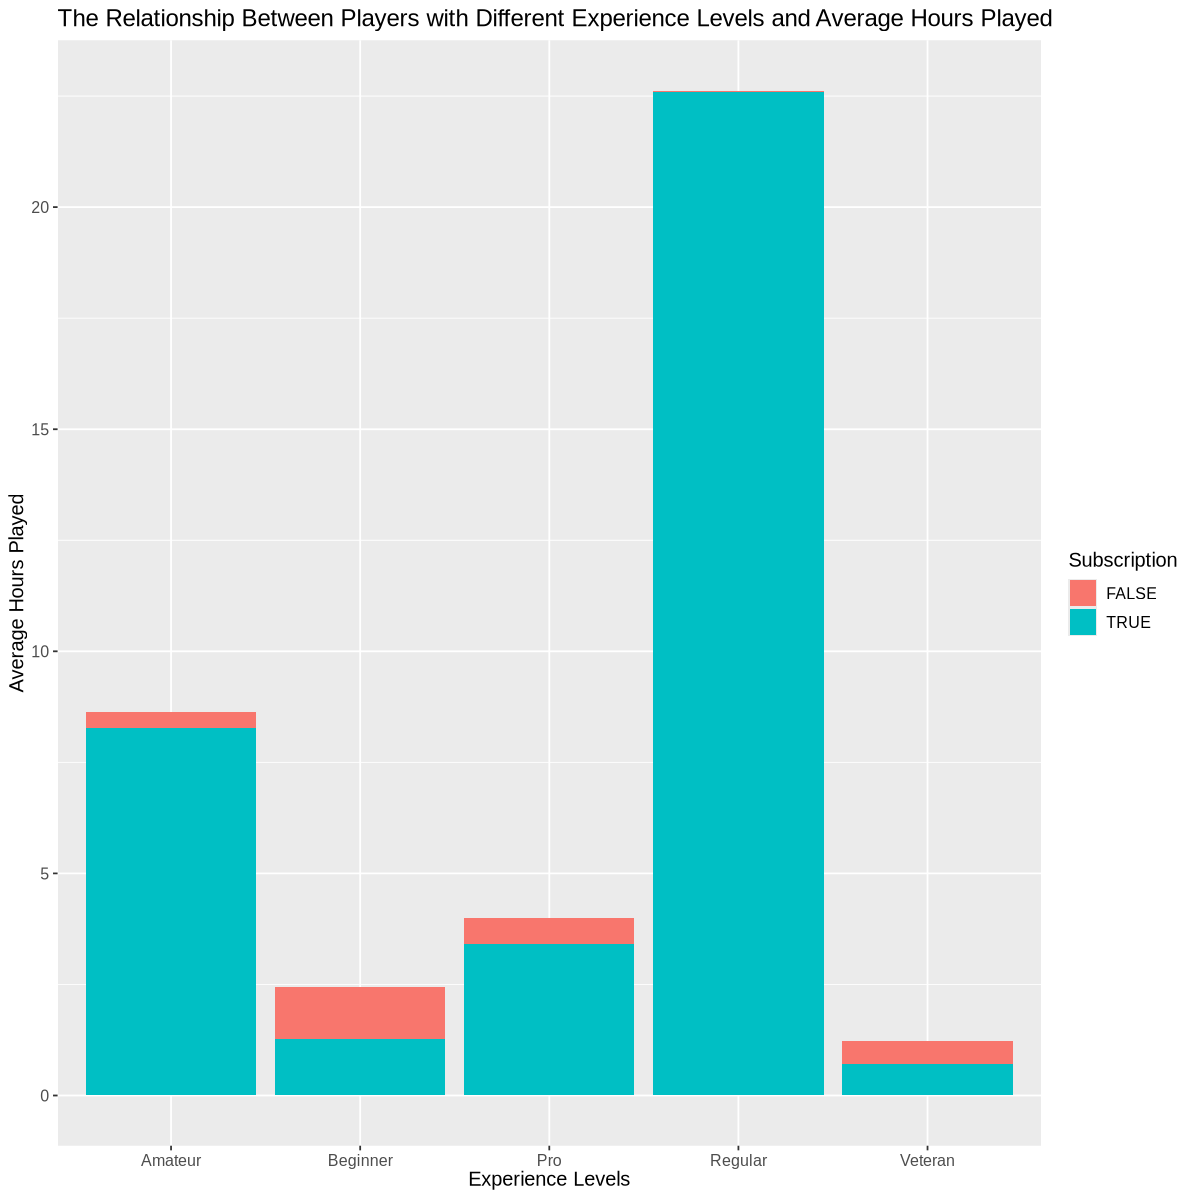

In [90]:
options(repr.plot.width = 10, repr.plot.height = 10)
players_graph <- sub_players |>
    ggplot(aes(x = experience, y = average_hours, fill = subscribe)) +
    geom_bar(stat = "identity") +
    labs(x = "Experience Levels",
         y = "Average Hours Played",
         fill = "Subscribed to Newsletter",
         title = "The Relationship Between Players with Different Experience Levels and Average Hours Played") +
    theme(text = element_text(size = 12))
players_graph